In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
print("\nLoading project task data...")
df = pd.read_csv("project_milestone_health.csv")
print(df.head())


Loading project task data...
  Project_ID Task_ID     Owner  Planned_Duration  Actual_Duration  \
0   PROJ_101   T1000  Internal                 8               12   
1   PROJ_101   T1001  Vendor X                15               15   
2   PROJ_101   T1002    Team B                12               14   
3   PROJ_101   T1003    Team A                10               14   
4   PROJ_101   T1004    Team C                16               23   

        Status  Start_Date    End_Date Priority Dependency  
0  In Progress  2024-01-01  2024-01-09   Medium        NaN  
1    Completed  2024-01-04  2024-01-19     High        NaN  
2      Blocked  2024-01-06  2024-01-18     High        NaN  
3    Completed  2024-01-08  2024-01-18   Medium        NaN  
4  Not Started  2024-01-12  2024-01-28   Medium        NaN  


In [3]:
# Convert dates
print("\nConverting Start_Date and End_Date to datetime...")
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])



Converting Start_Date and End_Date to datetime...


In [4]:
# Calculate delay
df['Delay'] = df['Actual_Duration'] - df['Planned_Duration']
df['Is_Delayed'] = df['Delay'] > 0


Task status counts:
Status
Completed      73
In Progress    47
Not Started    15
Blocked        14
Name: count, dtype: int64


/var/folders/bq/5vjrfz8d501bv3f9dl1qhwrm0000gn/T/ipykernel_39239/1384086292.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='Set2')


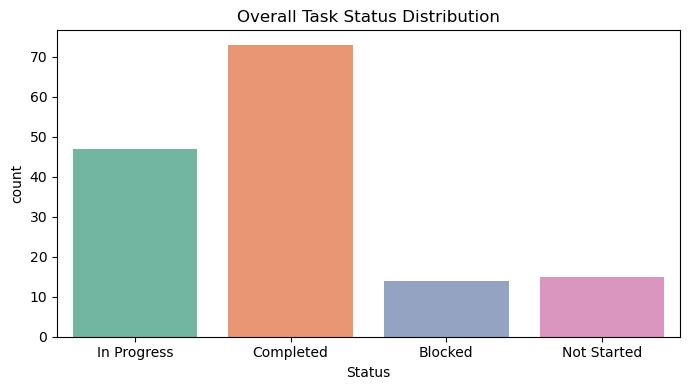

In [5]:
# =====================================
# 1. Overall Task Status Summary
# =====================================
print("\nTask status counts:")
print(df['Status'].value_counts())

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Status', palette='Set2')
plt.title('Overall Task Status Distribution')
plt.tight_layout()
plt.show()

/var/folders/bq/5vjrfz8d501bv3f9dl1qhwrm0000gn/T/ipykernel_39239/1004376664.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_rate, x='Project_ID', y='Delay_Rate (%)', palette='coolwarm')


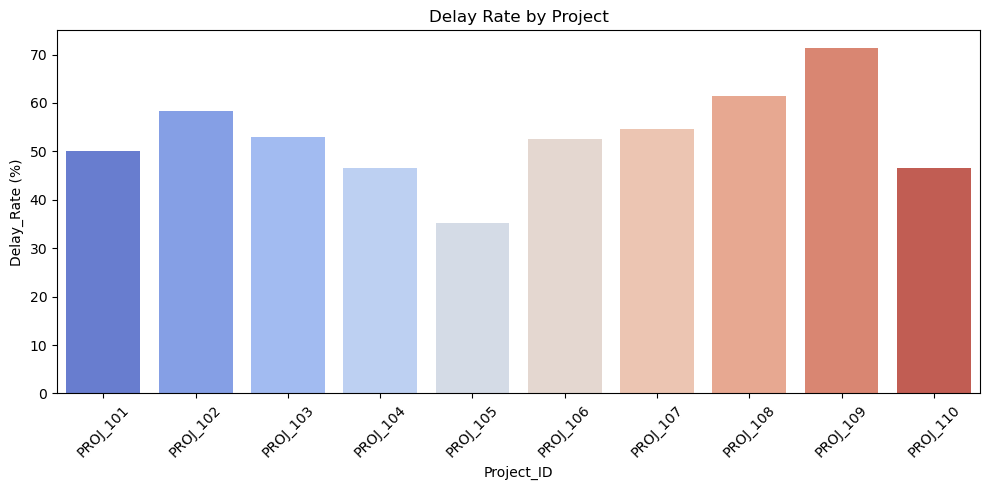

In [6]:
# =====================================
# 2. Delay Rate by Project
# =====================================
delay_rate = df.groupby('Project_ID')['Is_Delayed'].mean().reset_index()
delay_rate['Delay_Rate (%)'] = delay_rate['Is_Delayed'] * 100

plt.figure(figsize=(10, 5))
sns.barplot(data=delay_rate, x='Project_ID', y='Delay_Rate (%)', palette='coolwarm')
plt.title('Delay Rate by Project')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# =====================================
# 3. Average Duration by Status
# =====================================
avg_duration = df.groupby('Status')[['Planned_Duration', 'Actual_Duration']].mean().reset_index()
print("\nAverage durations by task status:")
print(avg_duration)


Average durations by task status:
        Status  Planned_Duration  Actual_Duration
0      Blocked         12.000000        15.142857
1    Completed         11.821918        14.589041
2  In Progress         11.893617        13.553191
3  Not Started         11.000000        14.800000


/var/folders/bq/5vjrfz8d501bv3f9dl1qhwrm0000gn/T/ipykernel_39239/2304524928.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Owner', order=df['Owner'].value_counts().index, palette='viridis')


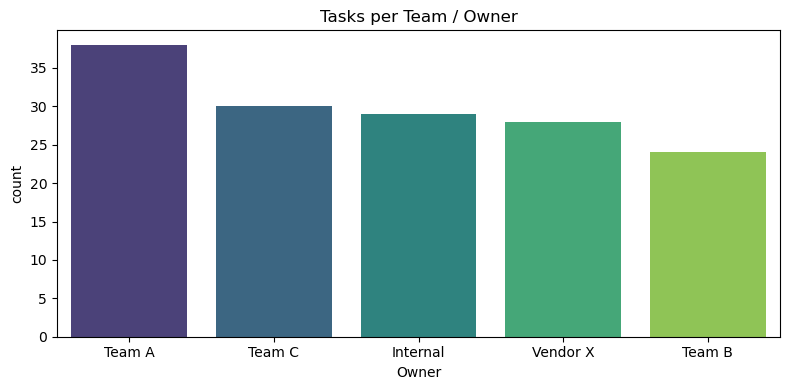

In [8]:
# =====================================
# 4. Team Workload (Task Count)
# =====================================
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Owner', order=df['Owner'].value_counts().index, palette='viridis')
plt.title('Tasks per Team / Owner')
plt.tight_layout()
plt.show()

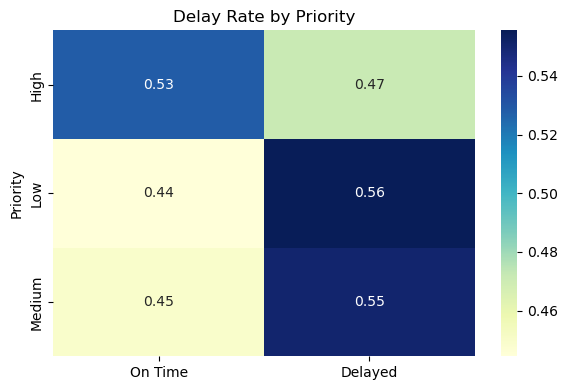

In [9]:
# =====================================
# 5. Delay vs Priority Heatmap
# =====================================
delay_priority = pd.crosstab(df['Priority'], df['Is_Delayed'])
delay_priority.columns = ['On Time', 'Delayed']
delay_priority = delay_priority.div(delay_priority.sum(axis=1), axis=0)

plt.figure(figsize=(6, 4))
sns.heatmap(delay_priority, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Delay Rate by Priority')
plt.tight_layout()
plt.show()
